In [1]:
import cv2
import matplotlib.pyplot as plt 

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# ** multiple face detection + blur**

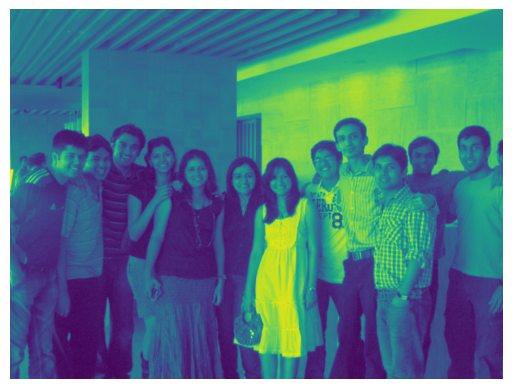

In [3]:
image = cv2.imread('/kaggle/input/face-detection-dataset/merged/images/validation/04877a9b53288a4f.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.axis('off')

output_image = image.copy()

In [4]:
# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(
    gray,        # input image
    scaleFactor=1.1,   # how much the image size is reduced at each scale
    minNeighbors=5,    # higher = fewer detections, but more accurate
    minSize=(30, 30)   # minimum face size to detect
)
print(f"Number of faces detected: {len(faces)}")

Number of faces detected: 12


In [5]:
for (x, y, w, h) in faces:
# cutting out the face rectangle from the whole image
    face_roi = output_image[y:y+h, x:x+w]
    
#  Gaussian blur to the face, bigger kernel = stronger blur (35,35). 30= sigma value (spread of the blur) higher = blurrier.
    blurred_face = cv2.GaussianBlur(face_roi, (35, 35), 30)
    
# replacing original img with blurred 
    output_image[y:y+h, x:x+w] = blurred_face
    
# rectangle around the detected face
    cv2.rectangle(output_image, (x, y), (x+w, y+h), (0, 255, 0), 2)


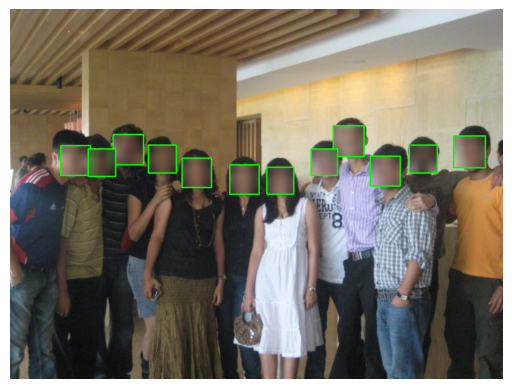

True

In [6]:
output_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(output_rgb)
plt.axis('off')
plt.show()

# saving result 
cv2.imwrite("blurred_faces_output.jpg", output_image)